In [1]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2

In [2]:
from PIL import Image 

In [3]:
model_weight_path = "/home/ksmehrab/GroundingModels/GroundingDINO/GroundingDINO/weights/groundingdino_swinb_cogcoor.pth"
model_config_path = "/home/ksmehrab/GroundingModels/GroundingDINO/GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py"

In [8]:
model = load_model(model_config_path, model_weight_path)
model = model.to(device="cuda:0")

final text_encoder_type: bert-base-uncased


In [12]:
image_path = "/data/VLMGroundingProject/Datasets/InstructPart/train1800/images/13627764_1e0fa06e6a_o-faucet-handle.jpg"

TEXT_PROMPT = "faucet"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(image_path)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

xyxy, _ = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)


In [13]:
import cv2
from PIL import Image, ImageFont
import numpy as np

def visualize_bounding_boxes(image, xyxy, phrases, confidences):
    """
    Visualize bounding boxes on an image with phrases and confidence scores.

    Args:
        image (PIL.Image.Image): The input image.
        xyxy (numpy.ndarray): Bounding boxes in xyxy format (x_min, y_min, x_max, y_max).
        phrases (list): List of phrases corresponding to each bounding box.
        confidences (list): List of confidence scores corresponding to each bounding box.

    Returns:
        PIL.Image.Image: The image with bounding boxes, phrases, and confidence scores drawn.
    """
    # Convert PIL image to NumPy array (OpenCV format)
    image_np = np.array(image)

    for box, phrase, confidence in zip(xyxy, phrases, confidences):
        x_min, y_min, x_max, y_max = map(int, box)
        # Draw the bounding box
        cv2.rectangle(image_np, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        # Prepare the label with phrase and confidence
        label = f"{phrase} ({confidence:.2f})"
        # Put the label text
        cv2.putText(image_np, label, (x_min, y_min + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert NumPy array back to PIL image
    return Image.fromarray(image_np)

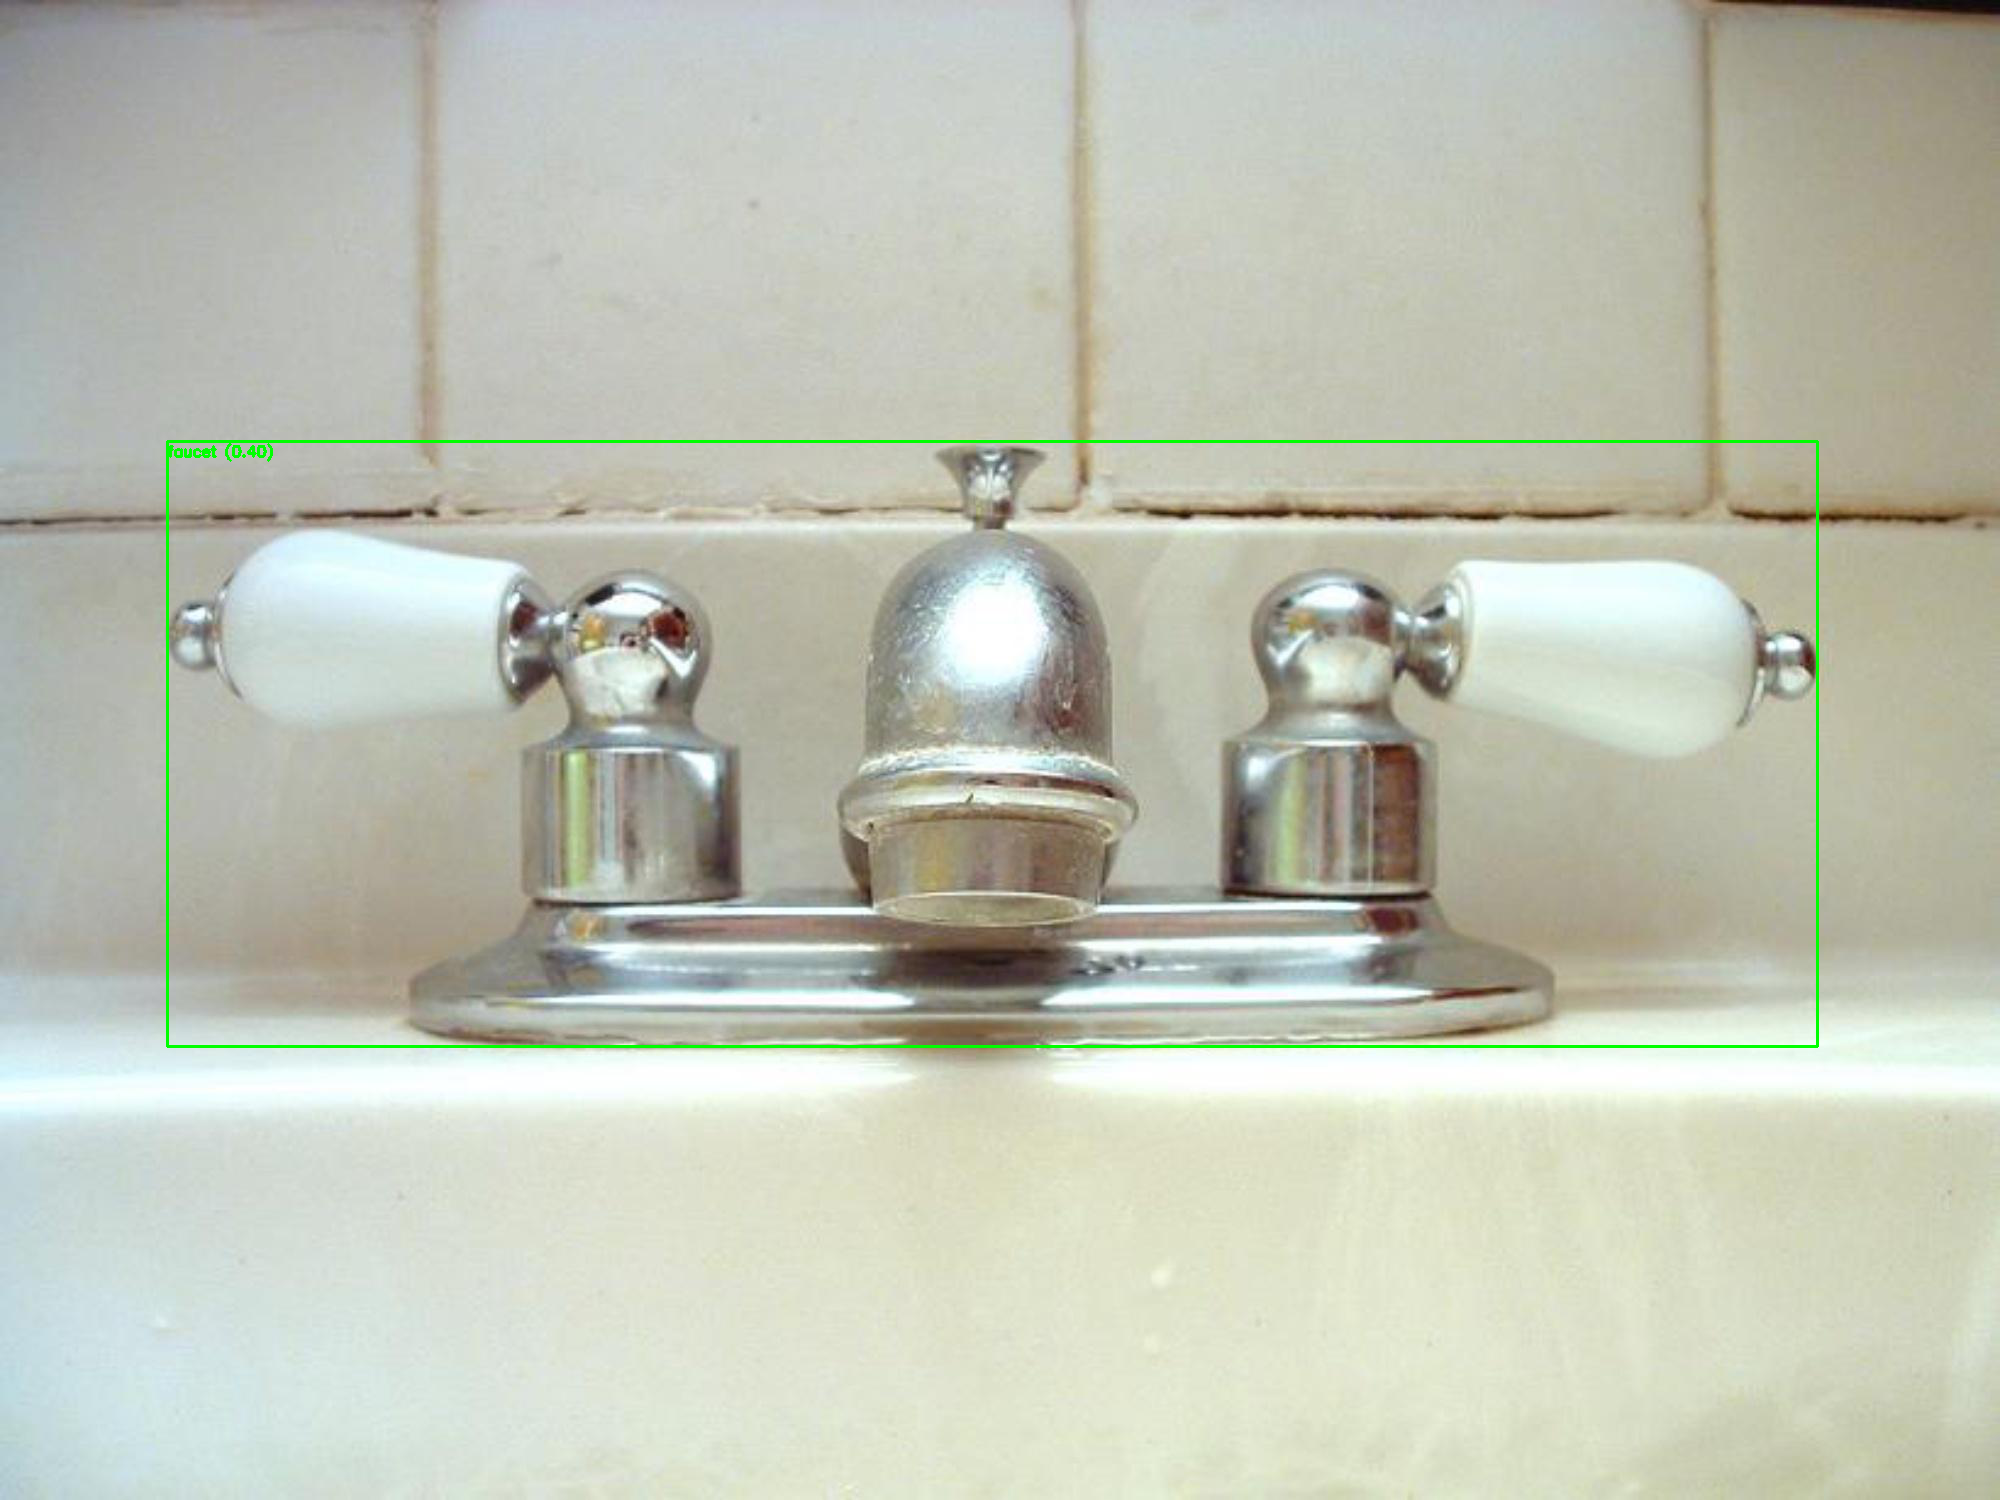

In [ ]:
visualize_bounding_boxes(Image.open(image_path).convert('RGB'), xyxy, phrases, logits)

In [15]:
import sys
sys.path.append('/home/ksmehrab/AttentionGrounding/Baselines/Models/GroundingDino')

from run_groundingdino import load_grdino_model, run_groundingdino, filter_boxes, remove_overlapping_boxes

In [18]:
overlap_removed_boxes = remove_overlapping_boxes(xyxy)

In [ ]:
overlap_removed_boxes

[array([ 167.29181,  441.83093, 1817.167  , 1046.122  ], dtype=float32)]